# Correlation Analysis
Analysis of the correlation between genes. We focus on "gene groups", a collection of genes that have identical trinary expression values.

In [1]:
import init
from common import constants as cn
from common.data_provider import DataProvider
from common import transform_data
from common_python.statistics import empirical_distribution_generator, density, multiple_density, util_statistics
from common_python.plots import util_plots
from plots import util_plots as uplots


from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import collections
import seaborn as sns

%matplotlib inline

In [2]:
provider = DataProvider()
provider.do()
len(provider.df_normalized)

2582

In [3]:
# Geenrate the feature data
def makeFeatureDF(provider):
    df_Xdata = transform_data.aggregateGenes(provider=provider)
    df_Xdata = df_Xdata.T
    df_Xdata = df_Xdata.drop(index="T0")
    data_features = df_Xdata.columns
    df_Xdata.columns = range(len(data_features))
    return df_Xdata

def makeFeatureColumns(provider):
    df_X = transform_data.aggregateGenes(provider=provider)
    df_X = df_X.T
    return df_X.columns.tolist()


df_Xdata = makeFeatureDF(provider)
df_Xdata.head()

,0,1,2,3,4,5,6,7,8,9,...,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514
T1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


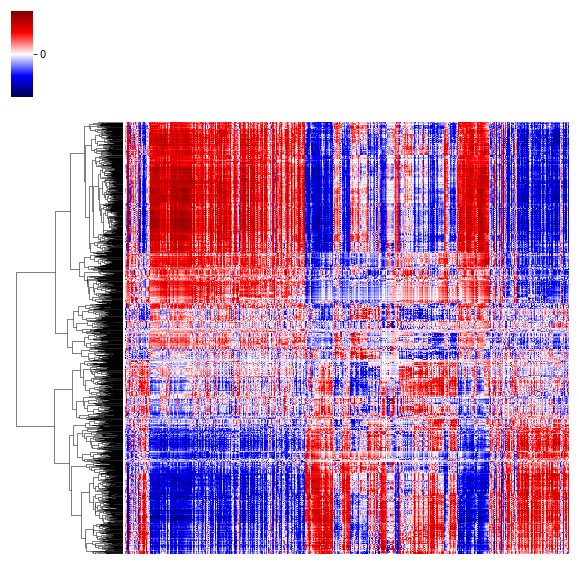

In [14]:
df_corr = df_Xdata.corr()
df_corr = df_corr.applymap(lambda v: 0 if np.isnan(v) else v)
cg = sns.clustermap(df_corr, col_cluster=False,
    cbar_kws={"ticks":[0,5]}, cmap="seismic")
_ = cg.ax_heatmap.set_xticklabels([])
_ = cg.ax_heatmap.set_xticks([])
_ = cg.ax_heatmap.set_yticklabels([])
_ = cg.ax_heatmap.set_yticks([])

In [12]:
cg.ax_heatmap.set_xticks([])

[]